<a href="https://colab.research.google.com/github/kartelmaks/diploma/blob/master/SSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px

from scipy.sparse import csr_matrix, lil_matrix, diags

In [2]:
#from google.colab import files
#uploaded = files.upload()


In [3]:
#X = pd.read_csv('data1.csv', header = None).transpose()

Герерація спетру

In [4]:
N = 1024
r_max = 100

M = [0, 10, 20]
sig_p = [5, 10, 5, 20, 15]
I = [0.9, 1, 0.8, 0.6, 0.75]
p = [100, 250, 500, 750, 900] 


(3, 1024)


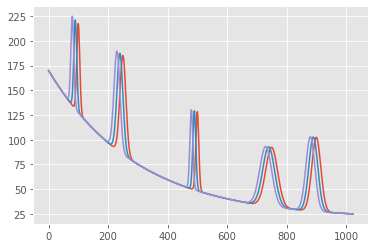

In [6]:
R = list()
for i in range(len(M)):
  R.append(get_spectr(M[i]))
R = np.array(R)
print(R.shape )

X_ = pd.DataFrame(R)
for i in range(len(X_)):
    Y_axis = np.array(X_.iloc[i,:], dtype = np.float32)
    X_axis = np.array(range(N))
    plt.plot(X_axis, Y_axis)
plt.show()



In [8]:
'''l1 = 400
l2 = 1340
X = X.iloc[:,l1:l2]
X.columns = range(l2-l1)'''

'l1 = 400\nl2 = 1340\nX = X.iloc[:,l1:l2]\nX.columns = range(l2-l1)'

In [ ]:
m, k = X.shape
print(m, k)

In [ ]:
shift = [0, 10, 20]

In [ ]:
E = diags([1], [0], shape=(k,k), dtype=float)
S = np.array(X)

In [ ]:
l = 2
n = 1

In [ ]:
I_arr = list()
E_arr = list()
E = diags([1], [0], shape=(k,k), dtype=float)

for r in range(m):
    I = diags([1], [-shift[r]], shape=(k,k), dtype=float)
    I_arr.append(I)
    
for r in range(m):
    E_arr.append(E)

A = [I_arr, E_arr]

# Матричний метод

In [ ]:
x = pd.DataFrame()
for i in range(l):    
    s = np.zeros(k)
    for j in range(m):

        R = lil_matrix(S[j]).T
        H = A[i][j]

        w = (H * R).toarray()
        s = [x + y for x, y in zip(s, w)]
        
    s = pd.DataFrame(s).transpose()
    x = x.append(s)
    print(x.shape)

            

In [ ]:
X_ = pd.DataFrame(x)
for i in range(len(X_)):
    Y_axis = np.array(X_.iloc[i,:], dtype = np.float32)
    plt.plot(Y_axis)
plt.show()

# NNLS

In [ ]:
from scipy.optimize import nnls

In [ ]:
I_arr1 = list()
E_arr1 = list()
E1 = np.diag(np.ones(k))

for r in range(m):
    I1 = np.diag(np.ones(k), k = -shift[r])
    I_arr1.append(I1)
    
for r in range(m):
    E_arr1.append(E1)

A1 = [I_arr1, E_arr1]

In [ ]:
X[0]

In [ ]:
R = list()
R.append(X.iloc[0])
R.append(X.iloc[1])
R.append(X.iloc[2])
R = np.array(R)
R.shape

In [ ]:
A1 = np.array(A)
R = np.array(R)

In [ ]:
R.shape

In [ ]:
#X = nnls(A1, R)